In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as img
import os

In [2]:
datadir = "./data/astro/"
videofile = datadir + "moving_frame.m4v"
video = cv2.VideoCapture(videofile)

In [3]:
total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
width  = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

In [4]:
freqdomain_r = np.zeros((height, width), dtype=np.complex128)
freqdomain_g = np.zeros((height, width), dtype=np.complex128)
freqdomain_b = np.zeros((height, width), dtype=np.complex128)
freqdomainA_r = np.zeros((0, height, width), dtype=np.float64)
freqdomainA_g = np.zeros((0, height, width), dtype=np.float64)
freqdomainA_b = np.zeros((0, height, width), dtype=np.float64)
freqdomainR_r = np.zeros((0, height, width), dtype=np.float64)
freqdomainR_g = np.zeros((0, height, width), dtype=np.float64)
freqdomainR_b = np.zeros((0, height, width), dtype=np.float64)
res, img = video.read()
imgno = 0
while res and imgno < 50:
    print("Processing image #", imgno + 1)
    image = img / 255.0
    dfftR = np.fft.fftshift(np.fft.fft2(image[:,:,0]))
    dfftG = np.fft.fftshift(np.fft.fft2(image[:,:,1]))
    dfftB = np.fft.fftshift(np.fft.fft2(image[:,:,2]))
    freqdomainA_r = np.concatenate((freqdomainA_r, np.expand_dims(np.angle(dfftR), axis=0)), axis=0)
    freqdomainA_g = np.concatenate((freqdomainA_g, np.expand_dims(np.angle(dfftG), axis=0)), axis=0)
    freqdomainA_b = np.concatenate((freqdomainA_b, np.expand_dims(np.angle(dfftB), axis=0)), axis=0)
    freqdomainR_r = np.concatenate((freqdomainR_r, np.expand_dims(np.abs(dfftR), axis=0)), axis=0)
    freqdomainR_g = np.concatenate((freqdomainR_g, np.expand_dims(np.abs(dfftG), axis=0)), axis=0)
    freqdomainR_b = np.concatenate((freqdomainR_b, np.expand_dims(np.abs(dfftB), axis=0)), axis=0)
    res, img = video.read()
    imgno = imgno + 1
print("Done.")
# ------------------------
freqdomainA_r[0, :, :] = np.mean(np.unwrap(freqdomainA_r[:, :, :], axis=0), axis=0)
freqdomainA_g[0, :, :] = np.mean(np.unwrap(freqdomainA_g[:, :, :], axis=0), axis=0)
freqdomainA_b[0, :, :] = np.mean(np.unwrap(freqdomainA_b[:, :, :], axis=0), axis=0)
freqdomainR_r[0, :, :] = np.mean(freqdomainR_r[:, :, :], axis=0)
freqdomainR_g[0, :, :] = np.mean(freqdomainR_g[:, :, :], axis=0)
freqdomainR_b[0, :, :] = np.mean(freqdomainR_b[:, :, :], axis=0)
freqdomain_r[:, :] = freqdomainR_r[0, :, :] * (np.cos(freqdomainA_r[0, :, :]) + np.sin(freqdomainA_r[0, :, :]) * 1j)
freqdomain_g[:, :] = freqdomainR_g[0, :, :] * (np.cos(freqdomainA_g[0, :, :]) + np.sin(freqdomainA_g[0, :, :]) * 1j)
freqdomain_b[:, :] = freqdomainR_b[0, :, :] * (np.cos(freqdomainA_b[0, :, :]) + np.sin(freqdomainA_b[0, :, :]) * 1j)
idfftR = np.abs(np.fft.ifft2(np.fft.ifftshift(freqdomain_r[:, :])))
idfftG = np.abs(np.fft.ifft2(np.fft.ifftshift(freqdomain_g[:, :])))
idfftB = np.abs(np.fft.ifft2(np.fft.ifftshift(freqdomain_b[:, :])))
idfft = np.stack((idfftR, idfftG, idfftB), axis=2)

Processing image # 1
Processing image # 2
Processing image # 3
Processing image # 4
Processing image # 5
Processing image # 6
Processing image # 7
Processing image # 8
Processing image # 9
Processing image # 10
Processing image # 11
Processing image # 12
Processing image # 13
Processing image # 14
Processing image # 15
Processing image # 16
Processing image # 17
Processing image # 18
Processing image # 19
Processing image # 20
Processing image # 21
Processing image # 22
Processing image # 23
Processing image # 24
Processing image # 25
Processing image # 26
Processing image # 27
Processing image # 28
Processing image # 29
Processing image # 30
Processing image # 31
Processing image # 32
Processing image # 33
Processing image # 34
Processing image # 35
Processing image # 36
Processing image # 37
Processing image # 38
Processing image # 39
Processing image # 40
Processing image # 41
Processing image # 42
Processing image # 43
Processing image # 44
Processing image # 45
Processing image # 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


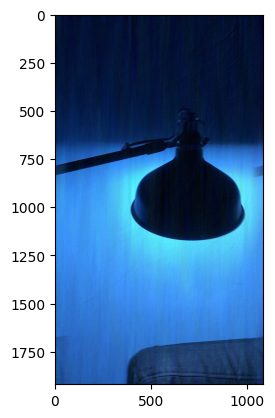

In [5]:
plt.imshow(np.transpose(idfft, (1, 0, 2)))
plt.show()

In [6]:
video.release()